In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt, date

# 61.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.

In [5]:
numbers = np.arange(1,31)
numbers = numbers.reshape(6,5)
print(numbers)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]


In [6]:
print(numbers[2:4,0:2]) 

[[11 12]
 [16 17]]


In [7]:
result = numbers[[2,2,3,3],[0,1,0,1]]   
print(result)

[11 12 16 17]


# 62.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [29]:
df = pd.read_excel('HospitalDatabase.xlsx','EDVisits')
df = pd.DataFrame(df, columns=['EDDisposition','Acuity'])
df.reset_index().groupby( [ "EDDisposition", "Acuity"],as_index=False ).count()

,EDDisposition,Acuity,index
0,Admitted,1,32
1,Admitted,2,116
2,Admitted,3,81
3,Admitted,4,107
4,Admitted,5,179
5,Discharged,1,558
6,Discharged,2,66
7,Discharged,4,30
8,Discharged,5,30


# 63.List male patients over the age of 60 who have undergone surgery from January-March 2019.

In [52]:
df = pd.read_excel('HospitalDatabase.xlsx','Patients')
now = pd.to_datetime('now')
#calculate Age
df['Age']=(now - df['DateOfBirth']).astype('<m8[Y]') 
 

0     1960-01-01 00:00:00.000
1     1985-11-15 02:08:42.090
2     1976-04-15 02:52:09.762
3     1968-10-15 03:32:13.635
4     1962-05-01 19:12:58.950
                ...          
940   1986-05-26 00:01:19.761
941   1970-06-10 21:41:03.814
942   1983-01-08 21:49:27.884
943   1963-06-05 07:57:05.569
944   1972-08-06 03:40:03.454
Name: DateOfBirth, Length: 945, dtype: datetime64[ns]

C:\Users\gowth\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,63.0
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,37.0
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46.0
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,54.0
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60.0
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36.0
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52.0
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,40.0
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59.0


# 64.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.

In [23]:
df = pd.read_excel('HospitalDatabase.xlsx','Providers')
df = pd.DataFrame(df, columns=['ProviderName'])
df[['First Name', 'Last Name']] = df['ProviderName'].str.split(' ', 1, expand=True) #split the name using space 
df   # print the provider name ,first name and Last name

,ProviderName,First Name,Last Name
0,Sally Sue,Sally,Sue
1,Mike Myers,Mike,Myers
2,Jordan Michael,Jordan,Michael
3,Ted Texas,Ted,Texas
4,Ala Bama,Ala,Bama
5,Harry Kane,Harry,Kane
6,Barry Bar,Barry,Bar
7,Ted Green,Ted,Green
8,Ted Black,Ted,Black
9,Fred Man,Fred,Man


# 65.

# 75.Using numpy functions, multiply the following arrays a=np.arange(6).reshape(2,3) b=np.arange(6).reshape(3,2)

In [22]:
import numpy as np
a = np.arange(6).reshape(2,3)
b = np.arange(6).reshape(3,2)
print('a: \n',a)
print('b: \n',b)

a: 
 [[0 1 2]
 [3 4 5]]
b: 
 [[0 1]
 [2 3]
 [4 5]]


In [23]:
print('multiplied a and b is: \n', np.dot(a, b))

multiplied a and b is: 
 [[10 13]
 [28 40]]


# 76.Mortality O:E

# 77.Plot a graph to count the patients based on discharge disposition.

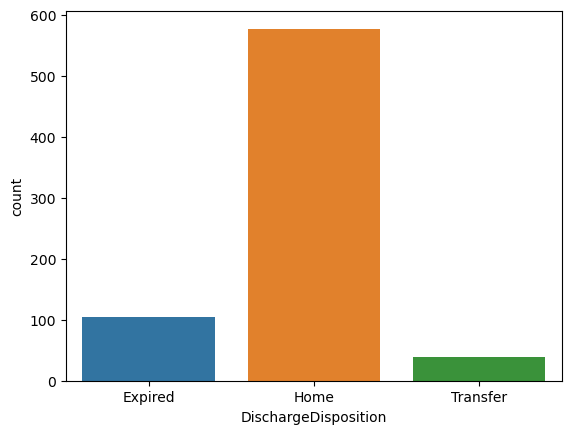

In [47]:
df = pd.read_excel('HospitalDatabase.xlsx','Discharges')
df = pd.DataFrame(df, columns=['DischargeDisposition','PatientID'])
#df.DischargeDisposition.value_counts()[df.DischargeDisposition.unique()].plot(kind='bar')
sns.countplot(x ='DischargeDisposition', data = df)
plt.show()

# 78.Display total count of patients service wise based on gender.

In [21]:
df1 = pd.read_excel('HospitalDatabase.xlsx','Patients')
df2 = pd.read_excel('HospitalDatabase.xlsx','ReAdmissionRegistry')
df = pd.merge(df1, df2, on='PatientID')
df = df.groupby(['Service']).Gender.value_counts()
print (df)

Service           Gender
Cardiology        Male       54
                  Female     41
General Medicine  Male      149
                  Female    114
Hospitalist       Male       66
                  Female     35
ICU               Male       86
                  Female     65
Neurology         Female     34
                  Male       31
Orthopeadics      Male       23
                  Female     22
Name: Gender, dtype: int64


# 79.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.

# 80.Display the data for all 'White Female' patients above the age of 50.